In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_wave_eq import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:917: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:929: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:962: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:974: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


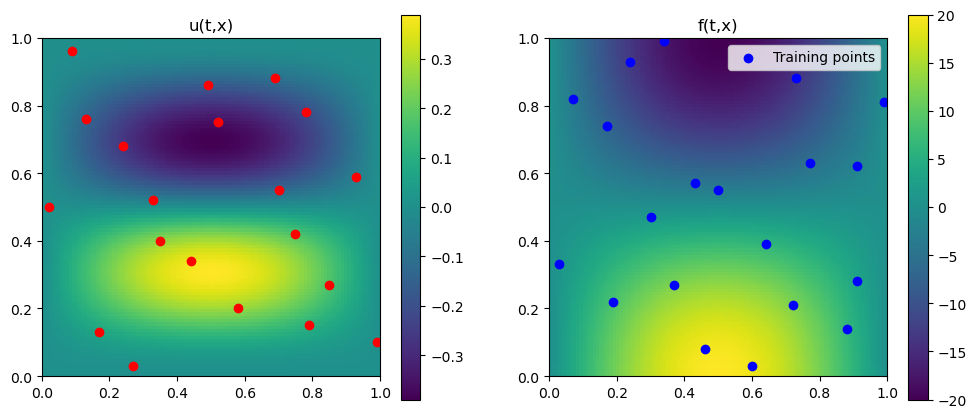

In [2]:
kernel_list = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
hyperparameters = ["l_x", "sigma_f","l_t", "c"]
model_wave_equation = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params=hyperparameters)
model_wave_equation.set_name_kernel("Wave_equation")

n_training_points = 20
noise = [1e-8,1e-8]
model_wave_equation.set_training_data("wave_second.csv ",n_training_points, noise)
n_validation_points = 500  #for calculating the MSE
model_wave_equation.set_validation_data(n_validation_points)
model_wave_equation.plot_raw_data(True,True)

In [3]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((4))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f
    theta_initial[2] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lt
    theta_initial[3] = rng.uniform(1, 4, 1)               #c
    return theta_initial
n_restarts = 500
n_threads = 8
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None), (1e-3, None),(1e-2, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-6}
model_wave_equation.train("Nelder-Mead",n_restarts, n_threads,opt_params_dict)

100%|██████████| 500/500 [01:33<00:00,  5.35it/s]


 final_simplex: (array([[0.6915637 , 0.36657046, 0.23534321, 3.00216507],
       [0.6915637 , 0.36657048, 0.23534322, 3.00216507],
       [0.6915637 , 0.36657047, 0.23534321, 3.00216507],
       [0.6915637 , 0.36657048, 0.23534321, 3.00216507],
       [0.6915637 , 0.36657047, 0.23534321, 3.00216507]]), array([18.85213852, 18.85213852, 18.85213852, 18.85213852, 18.85213852]))
           fun: 18.85213851928711
       message: 'Optimization terminated successfully.'
          nfev: 474
           nit: 245
        status: 0
       success: True
             x: array([0.6915637 , 0.36657046, 0.23534321, 3.00216507])


In [4]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), t_star.reshape(-1, 1)))
model_wave_equation.predict_model(X_star)

Traced<ShapedArray(float32[])>with<BatchTrace(level=4/0)> with
  val = Traced<ShapedArray(float32[20])>with<BatchTrace(level=3/0)> with
    val = Traced<ShapedArray(float32[20,20])>with<DynamicJaxprTrace(level=2/0)>
    batch_dim = 0
  batch_dim = 0
Traced<ShapedArray(float32[2])>with<BatchTrace(level=3/0)> with
  val = Traced<ShapedArray(float32[20,2])>with<DynamicJaxprTrace(level=2/0)>
  batch_dim = 0
Traced<ShapedArray(float32[])>with<BatchTrace(level=3/0)> with
  val = Traced<ShapedArray(float32[20])>with<BatchTrace(level=2/0)> with
    val = Traced<ShapedArray(float32[10000,20])>with<DynamicJaxprTrace(level=1/0)>
    batch_dim = 0
  batch_dim = 0
Traced<ShapedArray(float32[2])>with<BatchTrace(level=2/0)> with
  val = Traced<ShapedArray(float32[10000,2])>with<DynamicJaxprTrace(level=1/0)>
  batch_dim = 0
Traced<ShapedArray(float32[2])>with<BatchTrace(level=2/0)> with
  val = Traced<ShapedArray(float32[10000,2])>with<DynamicJaxprTrace(level=1/0)>
  batch_dim = 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


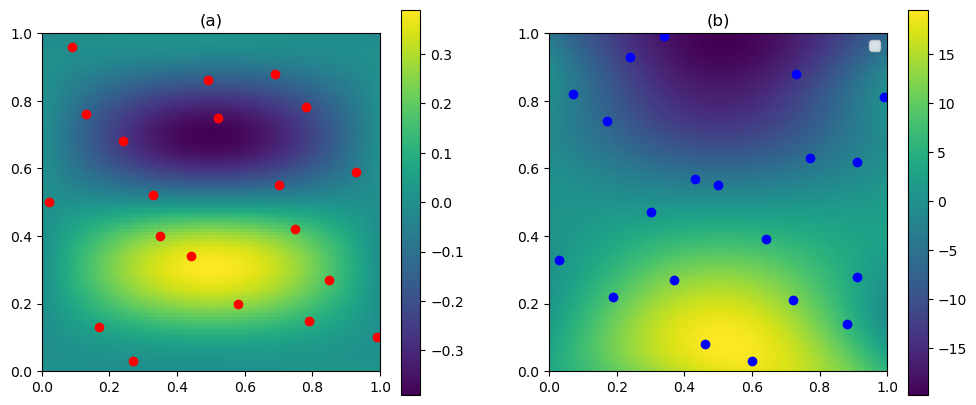

In [5]:
model_wave_equation.plot_prediction(X_star, "Predictive mean $\\overline{ f_*}$", "predictive_mean.png",heat_map=True)

Traced<ShapedArray(float32[])>with<BatchTrace(level=3/0)> with
  val = Traced<ShapedArray(float32[20])>with<BatchTrace(level=2/0)> with
    val = Traced<ShapedArray(float32[500,20])>with<DynamicJaxprTrace(level=1/0)>
    batch_dim = 0
  batch_dim = 0
Traced<ShapedArray(float32[2])>with<BatchTrace(level=2/0)> with
  val = Traced<ShapedArray(float32[500,2])>with<DynamicJaxprTrace(level=1/0)>
  batch_dim = 0
Traced<ShapedArray(float32[2])>with<BatchTrace(level=2/0)> with
  val = Traced<ShapedArray(float32[500,2])>with<DynamicJaxprTrace(level=1/0)>
  batch_dim = 0
-----------------------------------------------
GP with kernel: 
Training data: (20, 2)
Training targets: (40, 1)
Hyperparameters: {'l_x': 0.6915636958412399, 'sigma_f': 0.36657046097803925, 'l_t': 0.23534321254462193, 'c': 3.0021650723828763}
Log marginal likelihood: 18.85213851928711
Mean squared error: {'u': 8.886700925359037e-06, 'f': 0.8955530524253845}
-----------------------------------------------



 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:657: RuntimeWarning:invalid value encountered in sqrt


Traced<ShapedArray(float32[])>with<BatchTrace(level=3/0)> with
  val = Traced<ShapedArray(float32[20])>with<BatchTrace(level=2/0)> with
    val = Traced<ShapedArray(float32[10201,20])>with<DynamicJaxprTrace(level=1/0)>
    batch_dim = 0
  batch_dim = 0
Traced<ShapedArray(float32[2])>with<BatchTrace(level=2/0)> with
  val = Traced<ShapedArray(float32[10201,2])>with<DynamicJaxprTrace(level=1/0)>
  batch_dim = 0
Traced<ShapedArray(float32[2])>with<BatchTrace(level=2/0)> with
  val = Traced<ShapedArray(float32[10201,2])>with<DynamicJaxprTrace(level=1/0)>
  batch_dim = 0


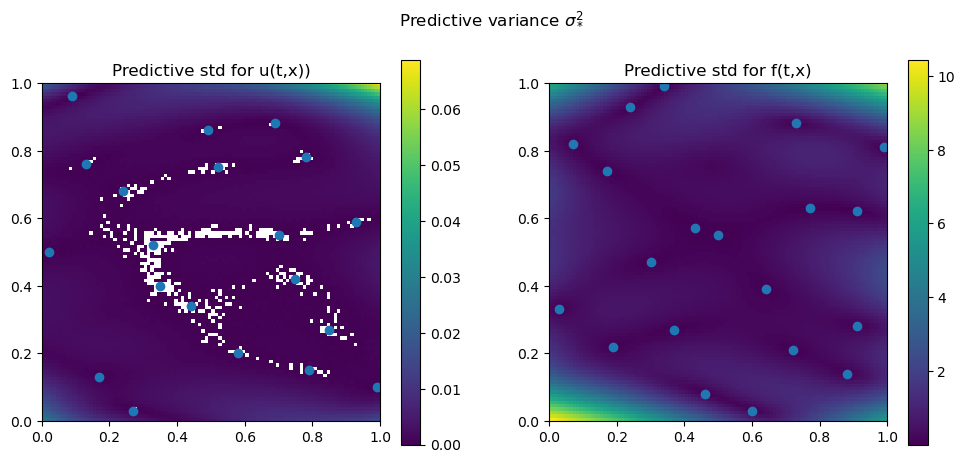

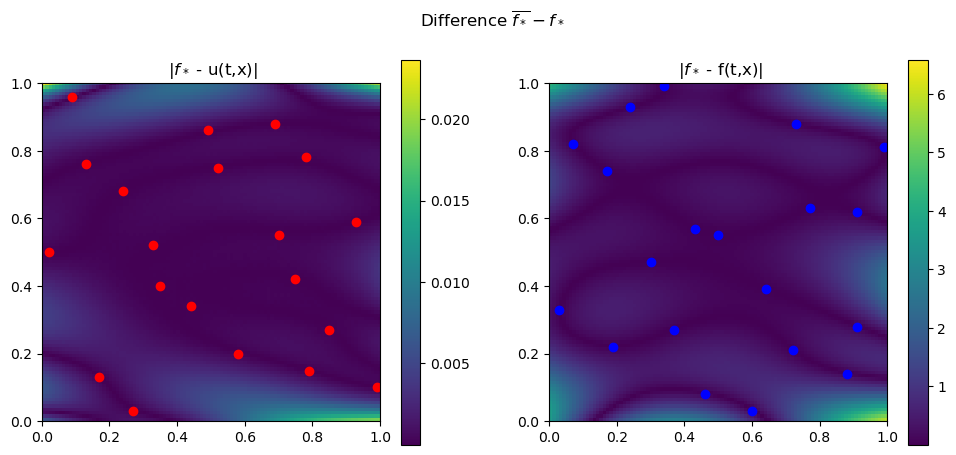

In [6]:
model_wave_equation.error()
print(model_wave_equation)
model_wave_equation.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model_wave_equation.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

Now the same thing with GPy and a classical RBF kernel

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


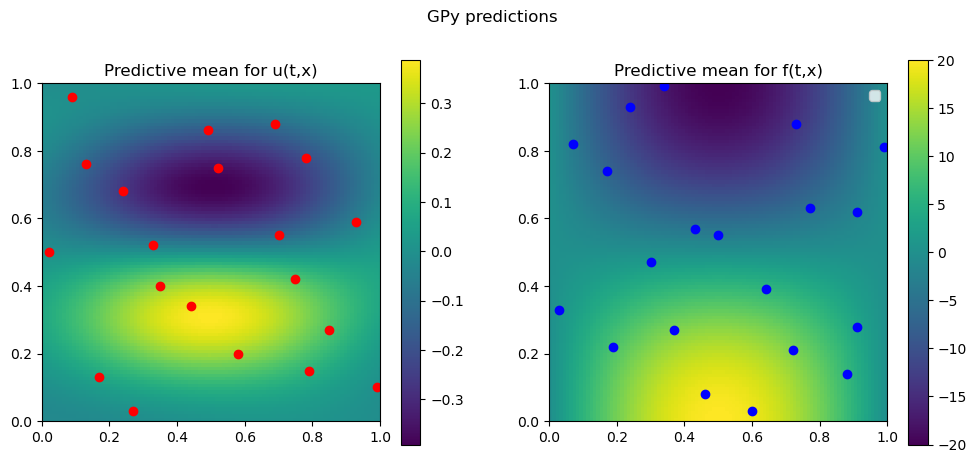

In [7]:
model_wave_equation.use_GPy(X_star,"GPy",True)


In [8]:
model_wave_equation.plot_difference_GPy("difference GPy ", "GPy_difference.png")
model_wave_equation.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")

TypeError: 'NoneType' object is not subscriptable